In [150]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-08 07:15:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.39MB/s    in 63s     

2020-10-08 07:16:13 (4.87 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [151]:
# mengekstrak file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [152]:
# library yang digunakan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [153]:
source_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [154]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper']

In [155]:
augmentation_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.4
)

train_generator = augmentation_gen.flow_from_directory(
    source_dir,
    target_size = (150,150),
    
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training'
)

validation_generator = augmentation_gen.flow_from_directory(
    source_dir,
    target_size=(150,150),
    
    batch_size = 32,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [156]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),

  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [157]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])


In [158]:
Model= model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)


Epoch 1/20
25/25 - 41s - loss: 2.9179 - accuracy: 0.3727 - val_loss: 0.6028 - val_accuracy: 0.8875
Epoch 2/20
25/25 - 39s - loss: 0.8978 - accuracy: 0.5857 - val_loss: 0.6573 - val_accuracy: 0.7375
Epoch 3/20
25/25 - 37s - loss: 0.6621 - accuracy: 0.7468 - val_loss: 0.6104 - val_accuracy: 0.7500
Epoch 4/20
25/25 - 37s - loss: 0.6050 - accuracy: 0.7625 - val_loss: 0.5640 - val_accuracy: 0.7937
Epoch 5/20
25/25 - 37s - loss: 0.4440 - accuracy: 0.8300 - val_loss: 0.4720 - val_accuracy: 0.8250
Epoch 6/20
25/25 - 36s - loss: 0.4640 - accuracy: 0.8143 - val_loss: 0.4646 - val_accuracy: 0.7875
Epoch 7/20
25/25 - 36s - loss: 0.3936 - accuracy: 0.8610 - val_loss: 0.7105 - val_accuracy: 0.7437
Epoch 8/20
25/25 - 36s - loss: 0.2550 - accuracy: 0.9065 - val_loss: 0.2749 - val_accuracy: 0.9062
Epoch 9/20
25/25 - 37s - loss: 0.2822 - accuracy: 0.9039 - val_loss: 0.2250 - val_accuracy: 0.8938
Epoch 10/20
25/25 - 37s - loss: 0.2034 - accuracy: 0.9312 - val_loss: 0.1223 - val_accuracy: 0.9500
Epoch 11/

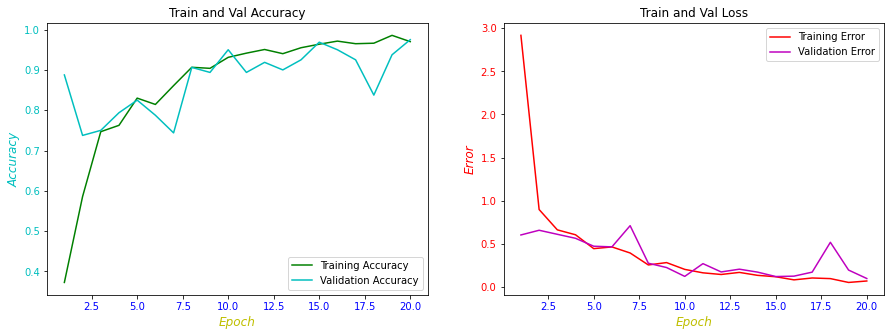

In [173]:
ep = np.arange(1,21,1)


fig, ax = plt.subplots(1, 2, figsize=(15,5))

c1 = 'black'
c2 = 'red'
c3 = 'blue'

ax[0].set_title('Train and Val Accuracy')
ax[0].set_xlabel('Epoch', style='italic', size=12, color='y')
ax[0].set_ylabel('Accuracy', style='italic', size = 12, color = 'c')
ax[0].plot(ep, Model.history['accuracy'], color = 'g')
ax[0].plot(ep, Model.history['val_accuracy'], color = 'c')
ax[0].tick_params(axis='x', labelcolor=c3)
ax[0].tick_params(axis='y', labelcolor='c')
ax[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')

ax[1].set_title('Train and Val Loss')
ax[1].set_xlabel('Epoch', style='italic', size=12, color='y')
ax[1].set_ylabel('Error', style = 'italic', size = 12, color = 'r')
ax[1].plot(ep, Model.history['loss'], color = 'r')
ax[1].plot(ep, Model.history['val_loss'], color = 'm')
ax[1].tick_params(axis='x', labelcolor=c3)
ax[1].tick_params(axis='y', labelcolor=c2)
ax[1].legend(['Training Error', 'Validation Error'], loc='upper right')


Saving images.png to images.png
images.png
paper


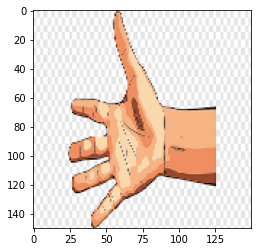

In [178]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

In [ ]:
Muhammad Rizki Hifdzia Fahmi
rizkihf13@gmail.com